<a href="https://colab.research.google.com/github/exponentialR/DeepLearningFundamentals/blob/main/Simple_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Get the data
!wget https://raw.githubusercontent.com/exponentialR/DeepLearningFundamentals/main/moore.csv

--2020-11-10 18:35:35--  https://raw.githubusercontent.com/exponentialR/DeepLearningFundamentals/main/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-11-10 18:35:35 (21.9 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
#Load in the data
data = pd.read_csv('moore.csv', header = None).values
X = data[:, 0].reshape(-1, 1) #make it a 2-D array of size N xD where D = 1 
Y = data[:, 1]

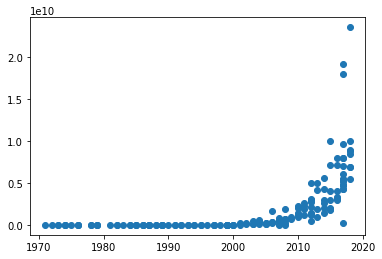

In [5]:
#now plot the data to the get the data curve/path (this visually determines, if it's linear or geometric or exponential)

#this visually shows the path of the data
plt.scatter(X, Y)

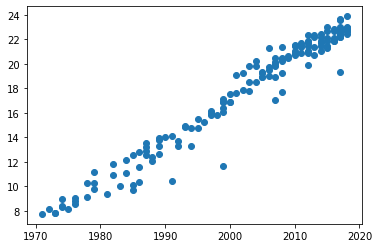

In [6]:
#We need to find a way to convert the model into a linear model, since it is still exponential

#Convert the data to Linear 

Y = np.log(Y)
plt.scatter (X, Y)

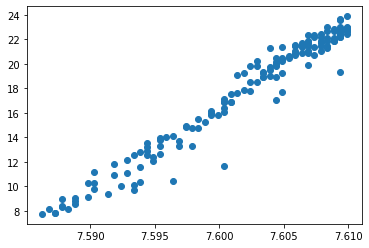

In [7]:
B = np.log(X)
plt.scatter(B, Y) 

In [8]:
#Now scale the X data so the values of the input are not too large. This is done by finding the difference between the input (X) amd the mean of the input (X), then equating it to the data input (X)

X = X - X.mean()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


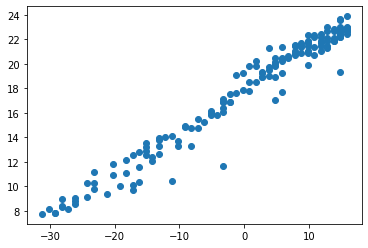

In [9]:
C = np.log(X)
plt.scatter(X, Y)

In [10]:
#It is time to create the model using tensorflow 
#remember for Logistics regression there is no activation function as with the case of classification model where sigmoid was used

#This is a Simple Linear Regression model with no activation function 

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile (optimizer=tf.keras.optimizers.SGD(0.01, 0.9), loss = 'mse')


def schedule (epoch, lr):
  if epoch>=50:
    return 0.0001
  return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#Train the model 

r = model.fit(X, Y, epochs =300, callbacks=[scheduler])

Epoch 1/300
6/6 [==============================] - 0s 2ms/step - loss: 359.5592
Epoch 2/300
6/6 [==============================] - 0s 1ms/step - loss: 283.6399
Epoch 3/300
6/6 [==============================] - 0s 2ms/step - loss: 273.3053
Epoch 4/300
6/6 [==============================] - 0s 2ms/step - loss: 215.5961
Epoch 5/300
6/6 [==============================] - 0s 2ms/step - loss: 157.1372
Epoch 6/300
6/6 [==============================] - 0s 2ms/step - loss: 126.0379
Epoch 7/300
6/6 [==============================] - 0s 1ms/step - loss: 89.8172
Epoch 8/300
6/6 [==============================] - 0s 1ms/step - loss: 105.4784
Epoch 9/300
6/6 [==============================] - 0s 2ms/step - loss: 71.0333
Epoch 10/300
6/6 [==============================] - 0s 1ms/step - loss: 41.8243
Epoch 11/300
6/6 [==============================] - 0s 2ms/step - loss: 28.9807
Epoch 12/300
6/6 [==============================] - 0s 2ms/step - loss: 18.5297
Epoch 13/300
6/6 [========================

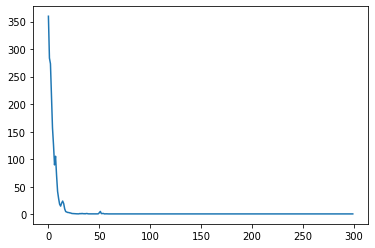

In [11]:
plt.plot(r.history['loss'], label = 'loss')


In [12]:
#Get the slope of the line 

print (model.layers)
print (model.layers[0].get_weights())

[array([[0.3368579]], dtype=float32), array([17.771112], dtype=float32)]


In [13]:
#The slope of the line is 
a = model.layers[0].get_weights()[0][0,0]

In [14]:
print ("Time to double according to Moore's law:", np.log(2)/a)

Time to double according to Moore's law: 2.057684297068754


In [15]:
#for the analytical solution time to double the transistors according to Moore's law

X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean()*X.sum()
a = (X.dot(Y) - Y.mean()*X.sum())/denominator
b = (Y.mean()*X.dot(X)-X.mean()*X.dot (Y))/denominator
print (a, b)
print ("Time to double according to Moore's law: ", np.log(2)/a)

0.341682487387313 17.764939393631764
Time to double according to Moore's law:  2.0286295205239204


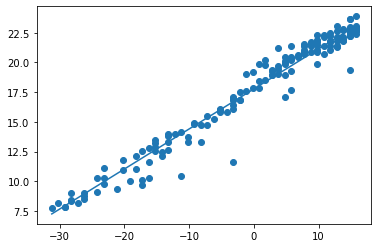

In [16]:
Yhat = model.predict(X).flatten()
plt.scatter (X, Y)
plt.plot (X, Yhat)

In [17]:
#Now to compare the result of the prediction of the model and the accuracy, compute the result manually
#Hence the manual calculation below. 

#get the weights 

w, b = model.layers[0].get_weights()

#Reshape the input since it was flattened im the previous block 
X = X.reshape (-1, 1)

#Now compute Wx + b -----> w and b has already been computed above and input X has already been reshaped =====> Y = W.X + b 
#Let output Y be denoted by Yhat2 

Yhat2 = (X.dot(w) + b).flatten()

np.allclose(Yhat, Yhat2)



True

In [22]:
model.save('logisticregression.h5')

In [23]:
!ls -lh

total 48K
-rw-r--r-- 1 root root  18K Nov 10 18:42 logisticregression.h5
-rw-r--r-- 1 root root  18K Nov 10 18:37 losgisticregression.h5
-rw-r--r-- 1 root root 2.3K Nov 10 18:35 moore.csv
drwxr-xr-x 1 root root 4.0K Nov  6 17:30 sample_data


In [27]:
model = tf.keras.models.load_model('logisticregression.h5')
print (model.layers)
model.evaluate(X, Yhat)



6/6 [==============================] - 0s 1ms/step - loss: 0.0000e+00


0.0

In [29]:
from google.colab import files
files.download ('logisticregression.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>